In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [49]:
data = pd.read_csv('../data/processed/processed_data.csv')


Доли постов каждой категории: y
1    0.511601
0    0.488399
Name: proportion, dtype: float64


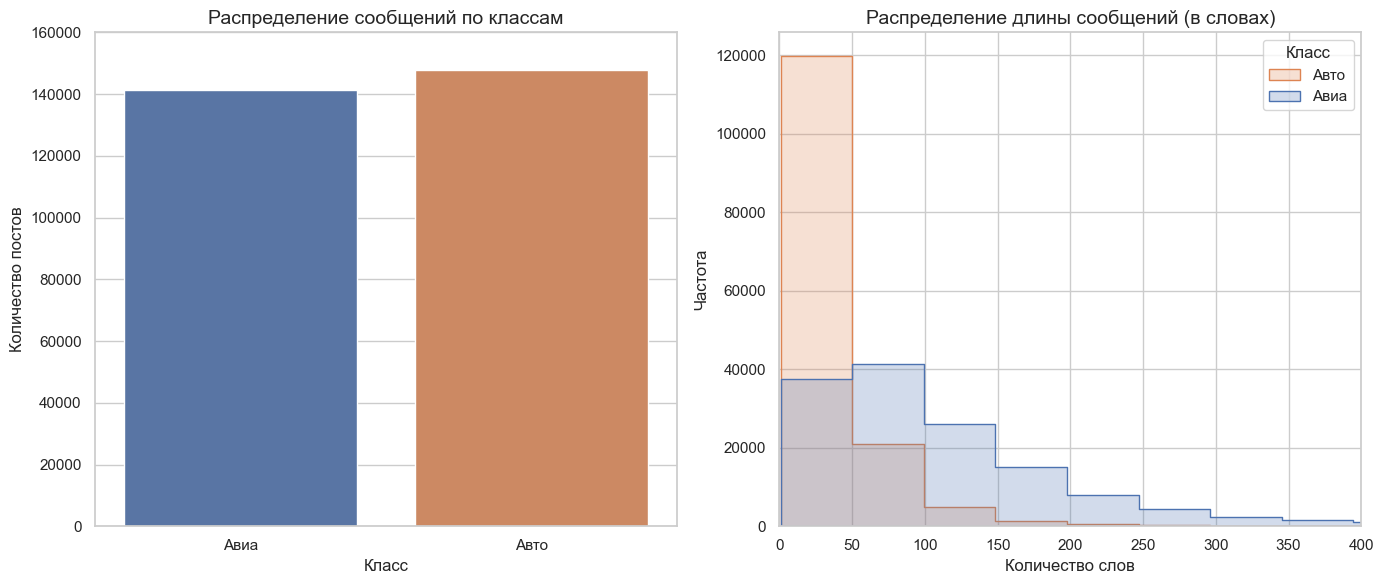

In [ ]:
print(f'\nДоли постов каждой категории: {data['y'].value_counts(normalize=True)}')

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# --- ГРАФИК 1: Распределение классов ---
plt.subplot(1, 2, 1)
ax = sns.countplot(x='y', data=data, hue='y', legend=False)
plt.ylim(top=160000)
plt.title('Распределение сообщений по классам', fontsize=14)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество постов', fontsize=12)
plt.xticks([0, 1], ['Авиа', 'Авто'])

# --- ГРАФИК 2: Распределение длины сообщений ---
data['word_count'] = data['processed_text'].apply(lambda x: len(str(x).split()))

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='word_count', hue='y', bins=34, element="step")
plt.xlim((0, 400))
plt.title('Распределение длины сообщений (в словах)', fontsize=14)
plt.xlabel('Количество слов', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend(title='Класс', labels=['Авто', 'Авиа'])

plt.tight_layout()
plt.show()

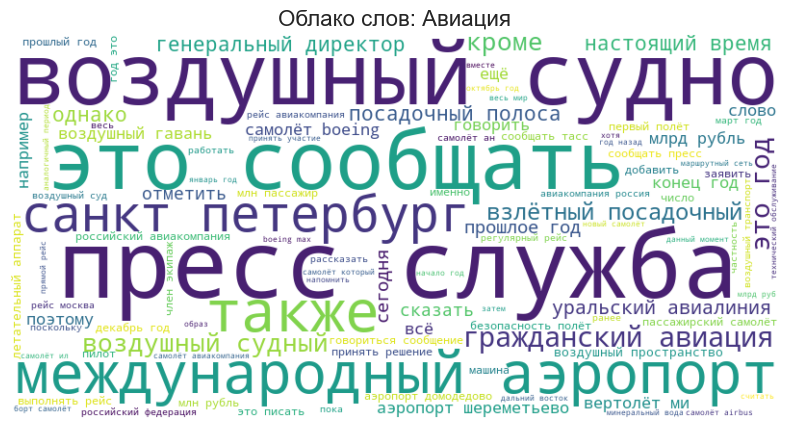

{'пресс служба': 1.0, 'воздушный судно': 0.8472395833333334, 'это сообщать': 0.7516666666666667, 'международный аэропорт': 0.6980208333333333, 'также': 0.6868229166666666, 'санкт петербург': 0.6091666666666666, 'гражданский авиация': 0.59328125, 'это год': 0.5727083333333334, 'воздушный судный': 0.499375, 'кроме': 0.48942708333333335, 'взлётный посадочный': 0.4855729166666667, 'генеральный директор': 0.48546875, 'настоящий время': 0.4794791666666667, 'однако': 0.46510416666666665, 'посадочный полоса': 0.44427083333333334, 'уральский авиалиния': 0.3947395833333333, 'прошлое год': 0.3734375, 'сегодня': 0.373125, 'сказать': 0.34979166666666667, 'отметить': 0.34890625, 'аэропорт шереметьево': 0.34640625, 'самолёт boeing': 0.34171875, 'млрд рубль': 0.3402604166666667, 'воздушный гавань': 0.33546875, 'вертолёт ми': 0.33125, 'всё': 0.32895833333333335, 'конец год': 0.3278125, 'поэтому': 0.31963541666666667, 'например': 0.31833333333333336, 'ещё': 0.31755208333333335, 'говорить': 0.30395833333

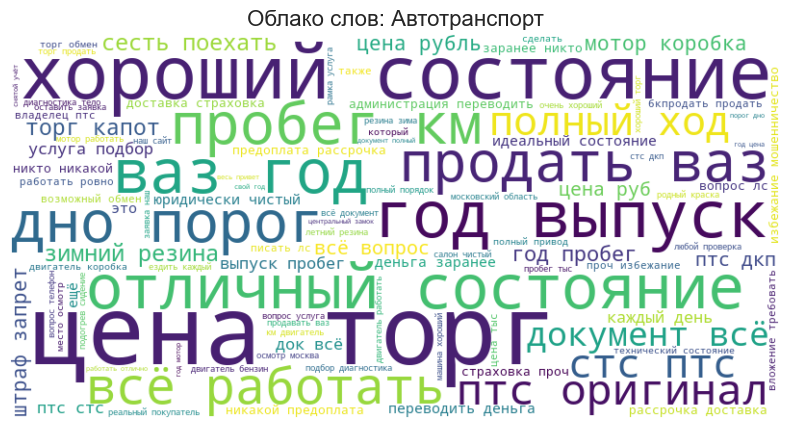

{'цена торг': 1.0, 'хороший состояние': 0.984739826551034, 'год выпуск': 0.7494162775183456, 'отличный состояние': 0.6620246831220814, 'ваз год': 0.6385923949299533, 'пробег км': 0.5727985323549033, 'дно порог': 0.5639593062041361, 'продать ваз': 0.5274349566377585, 'всё работать': 0.5226817878585723, 'птс оригинал': 0.516844563042028, 'полный ход': 0.45513675783855906, 'стс птс': 0.4483822548365577, 'документ всё': 0.44337891927951967, 'зимний резина': 0.4306204136090727, 'сесть поехать': 0.4170280186791194, 'торг капот': 0.39317878585723814, 'год пробег': 0.3621581054036024, 'мотор коробка': 0.34106070713809206, 'цена рубль': 0.3350567044696464, 'штраф запрет': 0.32746831220813877, 'всё вопрос': 0.30545363575717144, 'птс дкп': 0.303285523682455, 'цена руб': 0.2938625750500334, 'выпуск пробег': 0.2890260173448966, 'каждый день': 0.288025350233489, 'док всё': 0.27284856571047367, 'услуга подбор': 0.2683455637091394, 'птс стс': 0.26667778519012675, 'юридически чистый': 0.266594396264176

In [57]:
def plot_wordcloud(text_data, title):
    all_text = ' '.join([str(t) for t in text_data])
    
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=100,
        random_state=42
    ).generate(all_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

    print(wordcloud.words_)


plot_wordcloud(data[data['y'] == 0]['processed_text'], 'Облако слов: Авиация')

plot_wordcloud(data[data['y'] == 1]['processed_text'], 'Облако слов: Автотранспорт')